# Data analysis for Stack Overflow 2019 Survey results
This is the project 1 code for DSND term 2.

The database I pick is the Stack Overflow 2019 survey data. 

## A first look at the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import sklearn.preprocessing as sp
import matplotlib.pyplot as plt
import operator
from sklearn.cluster import KMeans
%matplotlib inline

# the pandas setting for display the data set.
# show all columns selected
# show all rows
# show all contents for a column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

# load data files
surveyfile = "./developer_survey_2019/survey_results_public.csv"
schemafile = "./developer_survey_2019/survey_results_schema.csv"
surveydf = pd.read_csv(surveyfile)
schemadf = pd.read_csv(schemafile)

In [2]:
surveydf.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,

In [3]:
surveydf.shape

(88883, 85)

In [4]:
surveydf.dtypes.value_counts() 

object     79
float64    5 
int64      1 
dtype: int64

In [5]:
surveydf.select_dtypes(include=['float64'])[0:5]

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,NaN,NaN,NaN,NaN,14.0
1,NaN,NaN,NaN,NaN,19.0
2,23000.0,8820.0,40.0,NaN,28.0
3,61000.0,61000.0,80.0,NaN,22.0
4,NaN,NaN,55.0,NaN,30.0


In [6]:
schemadf.head(5)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?


In [7]:
schemadf.shape

(85, 2)

Using info above, we get that there are total 85 survey questions with 88883 responds. The data set containing 79 catagorical variables, 5 float number variables and 1 int variable (which is actually the response ID). I am more interested in how does education play a role in their career, thus picking 21 questions for further understanding. 

In [8]:
subset = [
    'Hobbyist', 'OpenSourcer', 'Employment', 'Country',
    'Student', 'EdLevel', 'UndergradMajor', 'YearsCode',
    'YearsCodePro', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
    'CodeRev', 'CodeRevHrs', 'SocialMedia', 'Age', 'Gender'
]
select_dataset = surveydf[subset]
select_dataset.head(10)

,Hobbyist,OpenSourcer,Employment,Country,Student,EdLevel,UndergradMajor,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,WorkPlan,CodeRev,CodeRevHrs,SocialMedia,Age,Gender
0,Yes,Never,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,Twitter,14.0,Man
1,No,Less than once per year,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Instagram,19.0,Man
2,Yes,Never,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,3,1,8820.0,40.0,There's no schedule or spec; I work on what seems most important or urgent,No,NaN,Reddit,28.0,Man
3,No,Never,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",3,Less than 1 year,61000.0,80.0,There's no schedule or spec; I work on what seems most important or urgent,No,NaN,Reddit,22.0,Man
4,Yes,Once a month or more often,Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",16,9,NaN,55.0,"There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely","Yes, because I see value in code review",NaN,Facebook,30.0,Man
5,Yes,Never,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,13,3,366420.0,15.0,There's no schedule or spec; I work on what seems most important or urgent,No,NaN,YouTube,28.0,Man
6,No,Never,"Independent contractor, freelancer, or self-employed",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, electrical, mechanical)",6,4,NaN,32.0,"There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely","Yes, because I see value in code review",6.0,YouTube,42.0,Man
7,Yes,Less than once per year,"Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",8,NaN,NaN,NaN,NaN,NaN,NaN,YouTube,24.0,Man
8,Yes,Once a month or more often,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",12,4,95179.0,32.0,"There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns","Yes, because I see value in code review",12.0,Twitter,23.0,Man
9,Yes,Once a month or more often,Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,12,10,13293.0,70.0,There's no schedule or spec; I work on what seems most important or urgent,"Yes, because I see value in code review",4.0,YouTube,NaN,NaN


In [9]:
questions = schemadf[schemadf["Column"].isin(subset)]
questions

,Column,QuestionText
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?
13,YearsCode,"Including any education, how many years have you been coding?"
15,YearsCodePro,How many years have you coded professionally (as a part of your work)?
31,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks."


In [10]:
select_dataset.dtypes.value_counts() 

object     13
float64    4 
dtype: int64

In [11]:
select_dataset.dtypes

Hobbyist          object 
OpenSourcer       object 
Employment        object 
Country           object 
Student           object 
EdLevel           object 
UndergradMajor    object 
YearsCode         object 
YearsCodePro      object 
ConvertedComp     float64
WorkWeekHrs       float64
WorkPlan          object 
CodeRev           object 
CodeRevHrs        float64
SocialMedia       object 
Age               float64
Gender            object 
dtype: object

# Questions
The main goal is to look at the # 31 ConvertedComp - the salary. This is annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks. I am interested in how other 16 factors are contributing to the salaries. In 18 factors, there are 3 numeric data columns, (WorkWeekHrs, CodeRevHrs, Age), and all other 13 are catagorical data. But after a close look at the dataframe, we find that the (YearsCode and YearsCodePro) are also numberic values. 

# Remove missing data for *ConvertedComp*
Since our goal is to understand the converted salary, we could remove all records that have missing value for this column. In this step, we reduce the record number form 88883 to 55823. 

In [12]:
all_row_data = select_dataset.dropna(axis=0, how='all') # Drop only rows with all missing values 
all_col_data = all_row_data.dropna(axis=1, how='all') # Drop only columns with all missing values
all_col_data.shape

(88883, 17)

In [13]:
# remove records with missing value for salary. 
mis_salary_data = all_col_data.dropna(subset=["ConvertedComp"], axis=0, how='any')
mis_salary_data.shape

(55823, 17)

In [14]:
# remove columns with lots of missing values.
mis_salary_data.isna().mean(axis=0)

Hobbyist          0.000000
OpenSourcer       0.000000
Employment        0.002472
Country           0.000000
Student           0.006252
EdLevel           0.014886
UndergradMajor    0.081669
YearsCode         0.001541
YearsCodePro      0.002974
ConvertedComp     0.000000
WorkWeekHrs       0.009064
WorkPlan          0.019329
CodeRev           0.002114
CodeRevHrs        0.261451
SocialMedia       0.038980
Age               0.041381
Gender            0.016660
dtype: float64

Here we see that there is no column that has lots of missing values, thus we don't have to remove any column from the dataframe. 

In [15]:
# remove rows with lots of missing values.
mis_salary_data.isna().mean(axis=1).describe()

count    55823.000000
mean     0.029340    
std      0.041784    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.058824    
max      0.529412    
dtype: float64

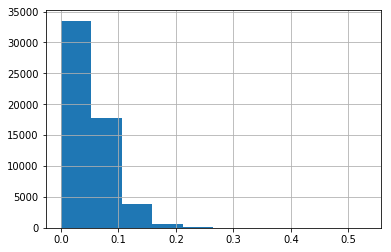

In [16]:
# ploting histogram for missing values in a row. 
mis_salary_data.isna().mean(axis=1).hist()

A convenient definition of an outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.

In [17]:
sub_stats=mis_salary_data.isna().mean(axis=1).describe()
sub_iqr = sub_stats["75%"] - sub_stats["25%"]
sub_barrier = sub_iqr * 1.5 + sub_stats["75%"]
sub_barrier

0.14705882352941174

In [18]:
# drop records that have missing values that are more than barrier calculated
mis_row_data = mis_salary_data[mis_salary_data.isna().mean(axis=1)<sub_barrier]
mis_row_data.shape

(55086, 17)

For filtering out records with more missing values, we reduce the record number from 55823 to 55806.

In [19]:
mis_row_data["YearsCode"].value_counts()

10                    4833
5                     3873
6                     3794
8                     3671
7                     3448
15                    2992
20                    2696
4                     2672
12                    2642
9                     2383
3                     2081
11                    1712
14                    1620
13                    1555
18                    1457
2                     1290
16                    1230
25                    1167
17                    1079
30                    1020
22                    806 
19                    784 
35                    581 
23                    557 
21                    550 
24                    490 
1                     410 
28                    335 
26                    308 
27                    306 
40                    304 
32                    293 
37                    241 
33                    239 
38                    227 
34                    219 
36                    205 
L

In [20]:
mis_row_data["YearsCodePro"].value_counts()

3                     5827
2                     5814
5                     4925
4                     4842
6                     3499
10                    3255
1                     3085
7                     2811
8                     2659
Less than 1 year      2561
12                    1709
9                     1556
15                    1535
20                    1443
11                    1332
13                    1080
14                    881 
18                    872 
16                    580 
19                    578 
22                    507 
17                    485 
25                    480 
21                    414 
30                    357 
23                    324 
24                    220 
28                    151 
35                    143 
26                    137 
27                    134 
32                    132 
29                    91  
33                    85  
31                    75  
34                    70  
40                    65  
3

In [21]:
# replace the Less than 1 year with 0, and more than 50 years with 51
mis_row_data.loc[:,"YearsCode"].replace({"Less than 1 year": "0", "More than 50 years": "51"}, inplace = True)
mis_row_data.loc[:,"YearsCodePro"].replace({"Less than 1 year": "0", "More than 50 years": "51"}, inplace = True)
mis_row_data.loc[:,"YearsCode"] = pd.to_numeric(mis_row_data.loc[:,"YearsCode"], errors='ignore')
mis_row_data.loc[:,"YearsCodePro"] = pd.to_numeric(mis_row_data.loc[:,"YearsCodePro"], errors='ignore')

E:\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Then let's look at the column data again.

In [22]:
mis_row_data["YearsCode"].value_counts()

10.0    4833
5.0     3873
6.0     3794
8.0     3671
7.0     3448
15.0    2992
20.0    2696
4.0     2672
12.0    2642
9.0     2383
3.0     2081
11.0    1712
14.0    1620
13.0    1555
18.0    1457
2.0     1290
16.0    1230
25.0    1167
17.0    1079
30.0    1020
22.0    806 
19.0    784 
35.0    581 
23.0    557 
21.0    550 
24.0    490 
1.0     410 
28.0    335 
26.0    308 
27.0    306 
40.0    304 
32.0    293 
37.0    241 
33.0    239 
38.0    227 
34.0    219 
36.0    205 
0.0     182 
29.0    170 
31.0    144 
39.0    116 
42.0    73  
41.0    58  
45.0    55  
43.0    52  
44.0    35  
51.0    20  
48.0    17  
47.0    16  
50.0    15  
49.0    12  
46.0    11  
Name: YearsCode, dtype: int64

In [23]:
mis_row_data["YearsCodePro"].value_counts()

3.0     5827
2.0     5814
5.0     4925
4.0     4842
6.0     3499
10.0    3255
1.0     3085
7.0     2811
8.0     2659
0.0     2561
12.0    1709
9.0     1556
15.0    1535
20.0    1443
11.0    1332
13.0    1080
14.0    881 
18.0    872 
16.0    580 
19.0    578 
22.0    507 
17.0    485 
25.0    480 
21.0    414 
30.0    357 
23.0    324 
24.0    220 
28.0    151 
35.0    143 
26.0    137 
27.0    134 
32.0    132 
29.0    91  
33.0    85  
31.0    75  
34.0    70  
40.0    65  
36.0    53  
38.0    53  
37.0    45  
39.0    38  
42.0    16  
43.0    13  
41.0    12  
51.0    11  
44.0    9   
45.0    7   
48.0    6   
47.0    3   
50.0    2   
46.0    2   
49.0    2   
Name: YearsCodePro, dtype: int64

In [24]:
mis_row_data.dtypes

Hobbyist          object 
OpenSourcer       object 
Employment        object 
Country           object 
Student           object 
EdLevel           object 
UndergradMajor    object 
YearsCode         float64
YearsCodePro      float64
ConvertedComp     float64
WorkWeekHrs       float64
WorkPlan          object 
CodeRev           object 
CodeRevHrs        float64
SocialMedia       object 
Age               float64
Gender            object 
dtype: object

After value replacement, we see the datatype of the these two columns automatically changed to float64. 

# A first glampse at the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F440AE7A90>,
      dtype=object)

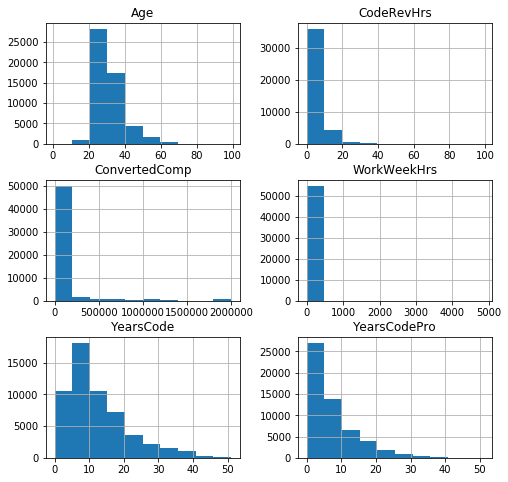

In [25]:
# plot all float valued columns.
mis_row_data.hist(figsize = (8,8))

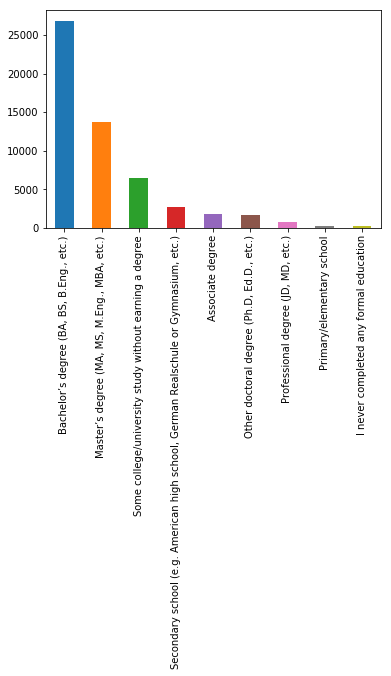

In [26]:
# education level for people who took survey
mis_row_data["EdLevel"].value_counts().plot.bar()

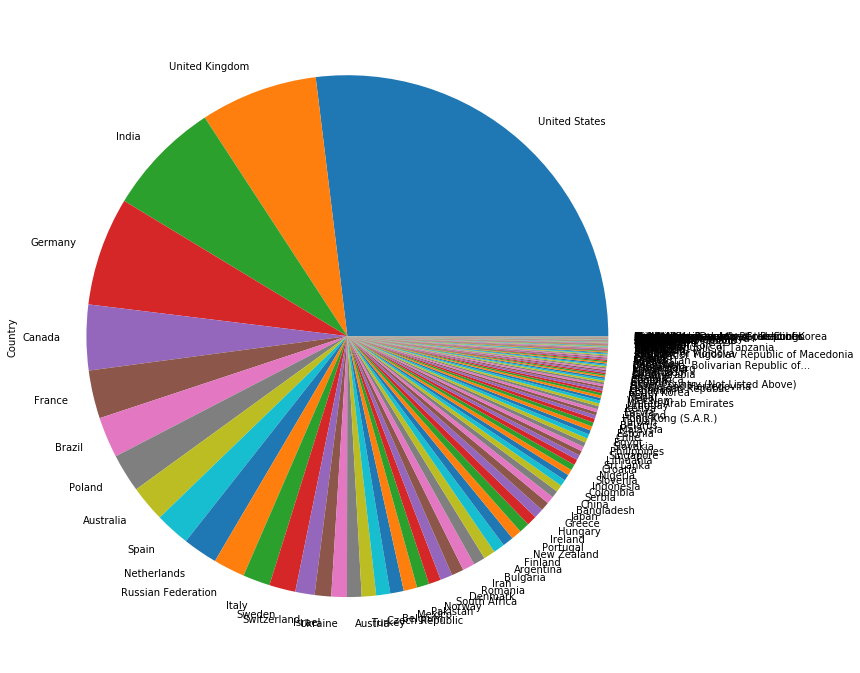

In [27]:
# Survey taker by country
mis_row_data["Country"].value_counts().plot.pie(figsize = (12,12))

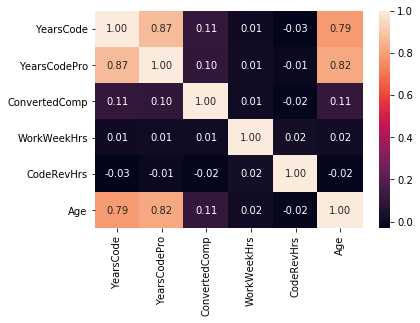

In [28]:
# correlation map for the float type data
sns.heatmap(mis_row_data.corr(), annot=True, fmt=".2f")

From an overview of the data, we sort of see that the salary distribution is pretty long tailed, while age has a distinct distribution, as it is more similar to a skewed normal distribution. The correlation graph doesn't give lots of info, except that the years of coding is correlated to years of professional coding, the age is correlated with the coding years, which make sense. 

# Create dummy variables for catagorical data columns

In [29]:
# obtain columns for catagorical data
cat_cols =  mis_row_data.columns[mis_row_data.dtypes=="object"]
cat_cols

Index(['Hobbyist', 'OpenSourcer', 'Employment', 'Country', 'Student',
       'EdLevel', 'UndergradMajor', 'WorkPlan', 'CodeRev', 'SocialMedia',
       'Gender'],
      dtype='object')

In [30]:
# create dummy variables for catagorical data columns 
dummy_data = pd.get_dummies(mis_row_data, columns = list(cat_cols))    # the step that converting the series to list is necessary for the function to work correctly
dummy_data.head()

,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Hobbyist_No,Hobbyist_Yes,OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Student_No,"Student_Yes, full-time","Student_Yes, part-time",EdLevel_Associate degree,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","Un

In [31]:
dummy_data.shape

(55086, 227)

# Fill the missing value with mean

In [32]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_data = dummy_data.apply(fill_mean, axis=0)
fill_data.head(5)

,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Hobbyist_No,Hobbyist_Yes,OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Student_No,"Student_Yes, full-time","Student_Yes, part-time",EdLevel_Associate degree,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","Un

# Scale data with robust scaler

In [33]:
# Apply feature scaling to the general population demographics data.
scaler = sp.RobustScaler()
scaler.fit(fill_data)
scaled_data = pd.DataFrame(scaler.transform(fill_data))
scaled_data.columns = fill_data.columns
scaled_data.index = fill_data.index
scaled_data.head(5)

,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,Hobbyist_No,Hobbyist_Yes,OpenSourcer_Less than once a month but more than once per year,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,Employment_Employed full-time,Employment_Employed part-time,"Employment_Independent contractor, freelancer, or self-employed",Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Brunei Darussalam,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Chad,Country_Chile,Country_China,Country_Colombia,"Country_Congo, Republic of the...",Country_Costa Rica,Country_Croatia,Country_Cuba,Country_Cyprus,Country_Czech Republic,Country_Côte d'Ivoire,Country_Democratic People's Republic of Korea,Country_Democratic Republic of the Congo,Country_Denmark,Country_Djibouti,Country_Dominican Republic,Country_Ecuador,Country_Egypt,Country_El Salvador,Country_Estonia,Country_Ethiopia,Country_Fiji,Country_Finland,Country_France,Country_Gabon,Country_Georgia,Country_Germany,Country_Ghana,Country_Greece,Country_Guatemala,Country_Guinea,Country_Haiti,Country_Honduras,Country_Hong Kong (S.A.R.),Country_Hungary,Country_Iceland,Country_India,Country_Indonesia,Country_Iran,Country_Iraq,Country_Ireland,Country_Israel,Country_Italy,Country_Jamaica,Country_Japan,Country_Jordan,Country_Kazakhstan,Country_Kenya,Country_Kuwait,Country_Kyrgyzstan,Country_Lao People's Democratic Republic,Country_Latvia,Country_Lebanon,Country_Lesotho,Country_Libyan Arab Jamahiriya,Country_Liechtenstein,Country_Lithuania,Country_Luxembourg,Country_Madagascar,Country_Malawi,Country_Malaysia,Country_Maldives,Country_Mali,Country_Malta,Country_Mauritius,Country_Mexico,Country_Monaco,Country_Mongolia,Country_Montenegro,Country_Morocco,Country_Mozambique,Country_Myanmar,Country_Nepal,Country_Netherlands,Country_New Zealand,Country_Nicaragua,Country_Nigeria,Country_Norway,Country_Oman,Country_Other Country (Not Listed Above),Country_Pakistan,Country_Panama,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Qatar,Country_Republic of Korea,Country_Republic of Moldova,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Saint Vincent and the Grenadines,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Singapore,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Korea,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Swaziland,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Taiwan,Country_Tajikistan,Country_Thailand,Country_The former Yugoslav Republic of Macedonia,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United Republic of Tanzania,Country_United States,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Student_No,"Student_Yes, full-time","Student_Yes, part-time",EdLevel_Associate degree,"EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)",EdLevel_I never completed any formal education,"EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)","EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",EdLevel_Primary/elementary school,"EdLevel_Professional degree (JD, MD, etc.)","EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",EdLevel_Some college/university study without earning a degree,"UndergradMajor_A business discipline (ex. accounting, finance, marketing)","Un

In [34]:
def model_plot(y, y_preds):
    """
    Description: This function plots predicted data versus true data for visulization of model preditability.
    
    Arguments:
        y: a 1-d data list for true results.
        y_preds: a 1-d data list for predicted model results.
        
    Returns:
        None
    """
    plt.plot(y, y_preds, "c.")
    plt.ylabel('Predictions')
    plt.xlabel("True data")

# Plain linear regression model

In [35]:
response_col = ["ConvertedComp"]
test_size = 0.2
rand_state = 123

#Split into explanatory and response variables
X = scaled_data.drop(response_col, axis=1)
y = scaled_data[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

lm_model = LinearRegression(normalize=False) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.1040152376553709
The testing score is:  -1227865771290015.8


Concluding from the linear regression model, we observe a very bad fitting. There might be two reason for it.

 - Sone of the data is catagorical. It is not suitable to model with linear model
 - The data don't have a linear trend for the salary

# Lasso linear model
This model have feature selection. 

In [36]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.001)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.10258134428013788
The testing score is:  0.09024590612320182


The model is better than the plain linear model, but still is really bad. 
The R2 score meaning how good a model fitting the data. smaller alpha value relax the feature selection, but won't help a lot for the training score. The training score and test score are consistent. 

# Kernel ridge regression

In [37]:
'''
from sklearn.kernel_ridge import KernelRidge

reg_kernel = KernelRidge(alpha=1)
reg_kernel.fit(X_train, y_train)  

#Predict using your model
y_test_kernel_preds = reg_kernel.predict(X_test)
y_train_kernel_preds = reg_kernel.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_kernel_preds)
train_score = r2_score(y_train, y_train_kernel_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)
'''

'\nfrom sklearn.kernel_ridge import KernelRidge\n\nreg_kernel = KernelRidge(alpha=1)\nreg_kernel.fit(X_train, y_train)  \n\n#Predict using your model\ny_test_kernel_preds = reg_kernel.predict(X_test)\ny_train_kernel_preds = reg_kernel.predict(X_train)\n\n#Score using your model\ntest_score = r2_score(y_test, y_test_kernel_preds)\ntrain_score = r2_score(y_train, y_train_kernel_preds)\n\nprint("The training score is: ", train_score)\nprint("The testing score is: ", test_score)\n'

The kernel ridge model doesn't help too much.
The algorithm is slow, while it have some similarities with the Lasso as it apply penoty to coefficients. 

# Combining Lasso with polynomial regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
  
poly = PolynomialFeatures(degree = 2 )
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train)

Lasso_line = linear_model.Lasso(alpha=0.001)
Lasso_line.fit(X_poly, y_train) 

#Predict using your model
y_test_poly_preds =Lasso_line.predict(poly.fit_transform(X_test))
y_train_poly_preds = Lasso_line.predict(poly.fit_transform(X_train))

#Score using your model
test_score = r2_score(y_test, y_test_poly_preds)
train_score = r2_score(y_train, y_train_poly_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.1242889261516621
The testing score is:  0.08683534942519011


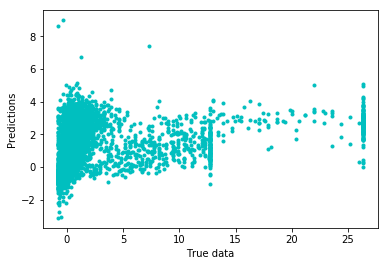

In [39]:
model_plot(y_test, y_test_poly_preds)

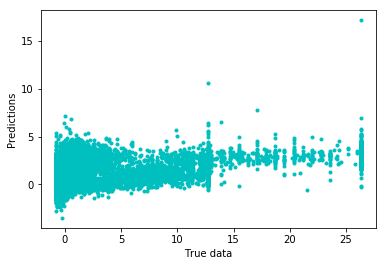

In [40]:
model_plot(y_train, y_train_poly_preds)

With the same alpha for lasso, the polynomial regression does give higher training score, but the test score is lower, meaning that there is likely to be overfitting. 

# Polynomial fitting


In [41]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2 )
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train)
poly_line = LinearRegression() 
poly_line.fit(X_poly, y_train) 

#Predict using your model
y_test_poly_preds =poly_line.predict(poly.fit_transform(X_test))
y_train_poly_preds = poly_line.predict(poly.fit_transform(X_train))

#Score using your model
test_score = r2_score(y_test, y_test_poly_preds)
train_score = r2_score(y_train, y_train_poly_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.1620969240151683
The testing score is:  -2818454221.3098507


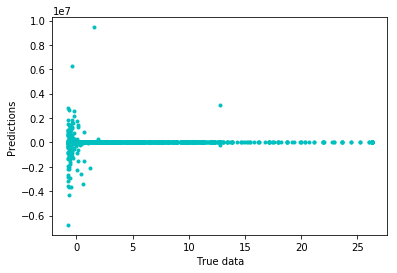

In [42]:
model_plot(y_test, y_test_poly_preds)

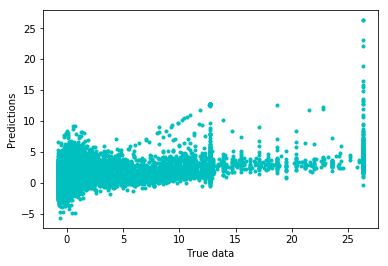

In [43]:
model_plot(y_train, y_train_poly_preds)

# PCA
PCA analysis is different from building a linear model. 
PCA analysis is looking at the data as a whole, and tell which are the factors that account most for the differences between data. As in our case, the transfered axis (components) does not mean a novo/meaningful classification, we would not consider it. Still, it would be interesting to see which are the factors that separate the survey takers. 

In [44]:
# Apply PCA to the data.
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

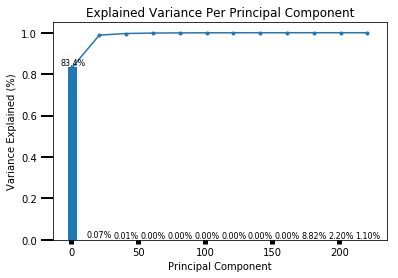

In [45]:
# Investigate the variance accounted for by each principal component.
num_components=len(pca.explained_variance_ratio_)
ind = np.arange(1,num_components,20)
vals = pca.explained_variance_ratio_
 
plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)[ind-1]
ax.bar(ind, vals[ind-1], width = 7)
ax.plot(ind, cumvals,'.-')

for i in ind:
    #print(vals[i-1], ind[i])
    ax.annotate(r"%s%%" % ((str(vals[i-1]*100)[:4])), (i+0.2, vals[i-1]), va="bottom", ha="center", fontsize=8)

ax.xaxis.set_tick_params(width=5)
ax.yaxis.set_tick_params(width=2, length=12)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

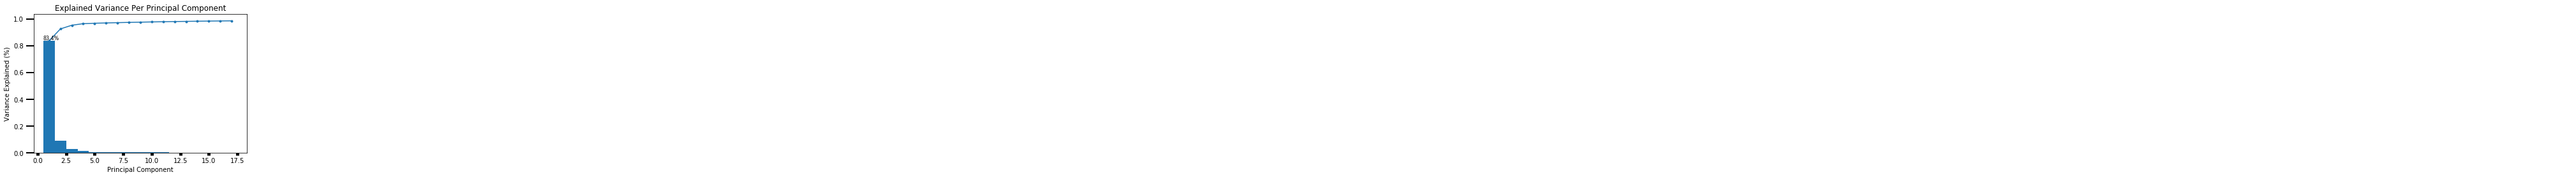

In [46]:
# Investigate the variance accounted for by each principal component.
# getting a more fine grain graph
num_components=len(pca.explained_variance_ratio_)
ind2 = np.arange(1,18,1)
vals = pca.explained_variance_ratio_
 
plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)[ind2-1]
ax.bar(ind2, vals[ind2-1], width = 1)
ax.plot(ind2, cumvals,'.-')

for i in ind:
    #print(vals[i-1], ind[i])
    ax.annotate(r"%s%%" % ((str(vals[i-1]*100)[:4])), (i+0.2, vals[i-1]), va="bottom", ha="center", fontsize=8)

ax.xaxis.set_tick_params(width=5)
ax.yaxis.set_tick_params(width=2, length=12)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

From a more fine graph, we can see that 5 components describe most of the variences.
Thus we can take a look at first 5 conponents.

In [47]:
ind

array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181, 201, 221])

In [48]:
pca2 = PCA(n_components = ind[1])
pca2.fit(scaled_data)
pcadata = pca2.transform(scaled_data)

In [186]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def weight_map(pca, data, n):
    """
    
    """
    weight = pca.components_[n-1]
    feature = data.columns
    if len(weight) != len(feature):
        print("there is something wrong")
        return
    i = 0
    adict = {}
    while i<len(weight):
        adict[feature[i]] = weight[i]
        i = i+1
    return adict

In [50]:
# the weightmap for the first component
weightmap1 = weight_map(pca2, scaled_data, 1)
# the sorter
sorted_weightmap1 = sorted(weightmap1.items(), key=operator.itemgetter(1))
sorted_weightmap1

[('Employment_Employed part-time', -0.0012049291731049594),
 ('Student_Yes, full-time', -0.0008571158925692043),
 ('Country_United Kingdom', -0.0004555458678025282),
 ('CodeRev_No', -0.0003507749080516605),
 ('Employment_Independent contractor, freelancer, or self-employed',
  -0.00032378111725569494),
 ('SocialMedia_Twitter', -0.00028279468448292813),
 ('Country_Germany', -0.0002810953424232365),
 ("WorkPlan_There's no schedule or spec; I work on what seems most important or urgent",
  -0.0002786242798089158),
 ('OpenSourcer_Less than once a month but more than once per year',
  -0.00023536673725356748),
 ('Country_Netherlands', -0.00020749957738946582),
 ('EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
  -0.0001994343808186664),
 ('Country_Canada', -0.00019440073319671985),
 ('SocialMedia_Reddit', -0.0001435395855969249),
 ('OpenSourcer_Once a month or more often', -0.00014048453660558404),
 ('Country_Spain', -0.00010988735938716312),
 ('

In PCA analysis, the most important component is always the first component. Here, we find that the weekly work hour is actually the 

In [51]:
# the weightmap for the second component
weightmap2 = weight_map(pca2, scaled_data, 2)
# the sorter
sorted_weightmap2 = sorted(weightmap2.items(), key=operator.itemgetter(1))
sorted_weightmap2

[('CodeRevHrs', -0.016388613423382926),
 ('Country_India', -0.006825943264744452),
 ('SocialMedia_WhatsApp', -0.005852955720799163),
 ('WorkWeekHrs', -0.005112717355866164),
 ('Student_Yes, full-time', -0.005015709369416467),
 ('CodeRev_No', -0.0037253442296670443),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
  -0.0030779731813110234),
 ('Employment_Employed part-time', -0.002849647065616661),
 ('Student_Yes, part-time', -0.0026226700845265664),
 ('SocialMedia_YouTube', -0.0025918169835549617),
 ('Country_Brazil', -0.0022205128215099746),
 ('Country_Poland', -0.0019622135251552582),
 ('EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
  -0.0019044529326950957),
 ('SocialMedia_Facebook', -0.0018564647771528748),
 ('Country_Russian Federation', -0.001736546308854787),
 ('OpenSourcer_Never', -0.0016912155366617797),
 ('Employment_Independent contractor, freelancer, or self-employed',


In [52]:
# the weightmap for the third component
weightmap3 = weight_map(pca2, scaled_data, 3)
# the sorter
sorted_weightmap3 = sorted(weightmap3.items(), key=operator.itemgetter(1))
sorted_weightmap3

[('YearsCode', -0.013176529045428053),
 ('OpenSourcer_Never', -0.012816841730145105),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns',
  -0.012107378059836941),
 ('Country_United States', -0.011551890401007915),
 ('SocialMedia_Reddit', -0.009769367101646198),
 ('Student_No', -0.009763046939601753),
 ('Age', -0.00949592137298644),
 ('YearsCodePro', -0.00561756174390404),
 ('Country_United Kingdom', -0.004982228204980526),
 ('Hobbyist_No', -0.004666704425107988),
 ('OpenSourcer_Less than once per year', -0.003955640516069891),
 ('WorkWeekHrs', -0.003944939111286122),
 ('Country_Germany', -0.0035762901922971667),
 ('Employment_Employed full-time', -0.0029846154869147723),
 ('UndergradMajor_A natural science (ex. biology, chemistry, physics)',
  -0.0026378389047696303),
 ('CodeRev_Yes, because I was told to do so', -0.0022605850659247586),
 ('EdLevel_Master’s degree (MA, MS, M.Eng., MBA, etc.)',
  -0.0020640881862861267),
 ('Employme

In [53]:
# the weightmap for the forth component
weightmap4 = weight_map(pca2, scaled_data, 4)
# the sorter
sorted_weightmap4 = sorted(weightmap4.items(), key=operator.itemgetter(1))
sorted_weightmap4

[('ConvertedComp', -0.0482937743838093),
 ('EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)', -0.04782475451052925),
 ('Student_Yes, full-time', -0.03702355396156281),
 ('OpenSourcer_Never', -0.035198818804847085),
 ('SocialMedia_Reddit', -0.0316970348792648),
 ('Country_India', -0.026877601695090063),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
  -0.020268824162629345),
 ('Student_Yes, part-time', -0.018139718623982285),
 ('CodeRev_No', -0.016870410531060122),
 ('SocialMedia_YouTube', -0.016762563580810626),
 ('SocialMedia_Instagram', -0.014661818097457374),
 ('Gender_Woman', -0.014558139706897443),
 ('Employment_Employed part-time', -0.013716100578535924),
 ('Employment_Employed full-time', -0.013670345902398977),
 ('CodeRev_Yes, because I was told to do so', -0.010285720514048113),
 ('EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
  -0.009209702500665932),
 ('UndergradMajor_

In [54]:
# the weightmap for the fifth component
weightmap5 = weight_map(pca2, scaled_data, 5)
# the sorter
sorted_weightmap5 = sorted(weightmap5.items(), key=operator.itemgetter(1))
sorted_weightmap5

[('CodeRev_Yes, because I see value in code review', -0.4450479633011732),
 ('WorkPlan_There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns',
  -0.36844247326205953),
 ('Hobbyist_Yes', -0.2538934164399024),
 ('OpenSourcer_Less than once a month but more than once per year',
  -0.18186914010957628),
 ('UndergradMajor_Computer science, computer engineering, or software engineering',
  -0.16502389260678677),
 ('OpenSourcer_Less than once per year', -0.1228233407363638),
 ('YearsCode', -0.06920742051911088),
 ('OpenSourcer_Once a month or more often', -0.05892240064574799),
 ('Gender_Man', -0.04505573765345097),
 ('EdLevel_Bachelor’s degree (BA, BS, B.Eng., etc.)', -0.040117626970330576),
 ('SocialMedia_Reddit', -0.03724931750323153),
 ('SocialMedia_Twitter', -0.036906245127150655),
 ('YearsCodePro', -0.03334485110943128),
 ('Employment_Employed full-time', -0.028517407697689193),
 ('Student_No', -0.019063288571019434),
 ('Country_Germany', -0.0112165

Above analysis is actually give us more information than needed. Thus it might be useful to look at terms that have the largest and lease weight. We can fix it by number of terms to show up, or we can define a barrier to understand it. Here I would like to define an weight threshold of 0.2. Thus any term with absolute weight greater than 0.2 will be print out. 

In [55]:
def obtain_weight_terms(fitted_pca_model, data, component_rank, threshold):
    # Function: print terms and corresponding weight, if the abs value of weight is over the threshold
    weightmap = weight_map(fitted_pca_model, data, component_rank)
    sorted_weightmap = sorted(weightmap.items(), key=operator.itemgetter(1))
    sig_weightmap = []
    i = 0
    while i<len(sorted_weightmap):
        if abs(sorted_weightmap[i][1]>=threshold):
            sig_weightmap.append(sorted_weightmap[i])
        i = i+1
    return sig_weightmap

In [56]:
pca_comp_threshold = 0.2
obtain_weight_terms(pca2, scaled_data, 1, pca_comp_threshold)

[('WorkWeekHrs', 0.9999738432270564)]

In [57]:
obtain_weight_terms(pca2, scaled_data, 2, pca_comp_threshold)

[('ConvertedComp', 0.9980609296012236)]

In [58]:
obtain_weight_terms(pca2, scaled_data, 3, pca_comp_threshold)

[('CodeRevHrs', 0.998972219509127)]

In [59]:
obtain_weight_terms(pca2, scaled_data, 4, pca_comp_threshold)

[('YearsCode', 0.523969613439597),
 ('Age', 0.5729186536916692),
 ('YearsCodePro', 0.6128108954415342)]

In [60]:
obtain_weight_terms(pca2, scaled_data, 5, pca_comp_threshold)

[('Hobbyist_No', 0.25389341643990243),
 ("WorkPlan_There's no schedule or spec; I work on what seems most important or urgent",
  0.3479157291261632),
 ('OpenSourcer_Never', 0.36361488149168797),
 ('CodeRev_No', 0.39467763644329945)]

Above show top factors that contribute to the first five components.The PCA only tell which factors would account for the differences, but with no bias if it is positive or negative. Thus that is depend on us to decide. Here we see from the data, the feature that separate people most is their work hours per week. Then it is their salary. Next is the code review hours. The forth component are mostly about the experience of the person. and then the fifth component containes mostly coding habits and life style. 

The first component give us different degree of deligentness. 
The second component give us the salary is also different a lot among people.

We have a glimpse on how survey taker are differentiated, now it's time to go a step further to see which factors are correlated. 

Firstly, let's reconstruct our linear model based on the PCA results.

# Lasso after PCA
Fewer features.

In [61]:
response_col = ["ConvertedComp"]
test_size = 0.2
rand_state = 123

#Split into explanatory and response variables
X = scaled_data[['WorkWeekHrs', 'CodeRevHrs', 'YearsCode', 'Age', 'YearsCodePro']]
y = scaled_data[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [62]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.2)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.008791159029511886
The testing score is:  0.007882945058368618


After feature shrinkage, the model get worse. The reason might be:

- The model is not a linear model.
- The dimention reduction lost too much infomation. 

Thus lets try a polynimial fitting.

# polynimial fitting

In [63]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2 )
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train)
poly_line = LinearRegression() 
poly_line.fit(X_poly, y_train) 

#Predict using your model
y_test_poly_preds =poly_line.predict(poly.fit_transform(X_test))
y_train_poly_preds = poly_line.predict(poly.fit_transform(X_train))

#Score using your model
test_score = r2_score(y_test, y_test_poly_preds)
train_score = r2_score(y_train, y_train_poly_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)
  
poly.fit(X_poly, y) 

The training score is:  0.016774714183215078
The testing score is:  0.010922791148388789


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

Comparing to lasso, the model have improved performance. But comparing to model using full set of data, this is a bad model. It might be helpful if we combining the ploynomial fitting with the lasso fitting. As lasso is selecting the features, and polynomial fitting is giving interaction terms. 

# Combining Lasso with polynomial fitting

In [64]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model
  
poly = PolynomialFeatures(degree = 3 )
X_poly = poly.fit_transform(X_train) 
poly.fit(X_poly, y_train)

Lasso_line = linear_model.Lasso(alpha=0.2)
Lasso_line.fit(X_poly, y_train) 

#Predict using your model
y_test_poly_preds =Lasso_line.predict(poly.fit_transform(X_test))
y_train_poly_preds = Lasso_line.predict(poly.fit_transform(X_train))

#Score using your model
test_score = r2_score(y_test, y_test_poly_preds)
train_score = r2_score(y_train, y_train_poly_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.009595071025385371
The testing score is:  -0.5420004213834837


E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# K-mean clustering

In [65]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...    
# compute the average within-cluster distances.

def kmean_n(data, n_list):
    i = 0
    score_list = []
    while i< len(n_list):
        data_kmean = KMeans(n_clusters = n_list[i])
        data_model = data_kmean.fit(data)
        data_score = np.abs(data_model.score(data))
        score_list.append(data_score)
        print(data_score)
        i = i+1
    return score_list

In [66]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
kn = np.arange(1,25,3)
data_score = kmean_n(pcadata, kn)

8952014.424076166
1733475.0757307517
980976.1583253297
723419.6805848812
589421.0422649073
506671.47911843937
457646.7976617637
432162.36466902436


[ 1  4  7 10 13 16 19 22]


Text(0.5, 1.0, 'SSE vs. K')

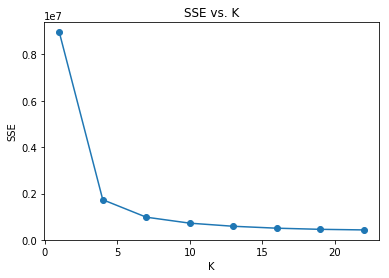

In [67]:
print(kn)
plt.plot(kn, data_score,"o-")
plt.xlabel("K")
plt.ylabel('SSE')
plt.title('SSE vs. K')

The best number of clusters for k-mean clustering is 5.

In [68]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmean_opt = KMeans(n_clusters = 5 )
kmean_model = kmean_opt.fit(pcadata)
kmean_data = kmean_model.predict(pcadata)

In [69]:
kmean_data

array([4, 4, 4, ..., 4, 4, 4])

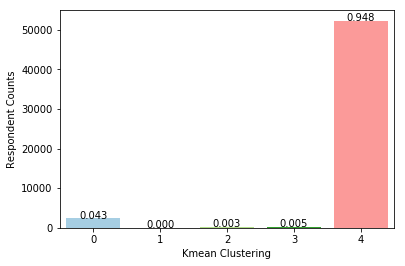

In [116]:
figure, ax = plt.subplots(nrows=1, ncols=1, figsize = (6,4))
sns.countplot(kmean_data, palette = sns.color_palette("Paired"), saturation =1, linewidth=0)
ax.set_xlabel('Kmean Clustering')
ax.set_ylabel("Respondent Counts")

total = len(kmean_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.3f}'.format(height/total),
            ha="center")

plt.savefig("K-mean-dist.png")

In [72]:
# What kinds of people are part of a cluster?
centroid_0 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[0])])
centroid_0_data = pd.Series(data = centroid_0[0], index = fill_data.columns).sort_values()
centroid_0_data

Country_Russian Federation                                                                              -4.190109e-03
Country_Iran                                                                                            -2.683023e-03
Country_Pakistan                                                                                        -2.369444e-03
Country_Brazil                                                                                          -2.215349e-03
Country_Turkey                                                                                          -2.163229e-03
Country_Poland                                                                                          -2.095119e-03
Country_Ukraine                                                                                         -1.955965e-03
SocialMedia_VK ВКонта́кте                                                                               -1.539559e-03
Country_Argentina                                       

In [73]:
# What kinds of people are part of a cluster?
centroid_1 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[1])])
centroid_1_data = pd.Series(data = centroid_1[0], index = fill_data.columns).sort_values()
centroid_1_data

Employment_Employed part-time                                                                           -1.084799    
Country_United Kingdom                                                                                  -0.659915    
Country_Germany                                                                                         -0.299708    
Country_Canada                                                                                          -0.275038    
Country_Netherlands                                                                                     -0.252403    
Student_Yes, full-time                                                                                  -0.218538    
Country_Spain                                                                                           -0.155859    
Country_United States                                                                                   -0.143685    
Country_Australia                                       

In [74]:
# What kinds of people are part of a cluster?
centroid_2 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[2])])
centroid_2_data = pd.Series(data = centroid_2[0], index = fill_data.columns).sort_values()
centroid_2_data

Employment_Employed part-time                                                                           -0.057317     
Country_Philippines                                                                                     -0.000692     
Gender_Woman;Man                                                                                        -0.000646     
Country_Myanmar                                                                                         -0.000638     
Country_Uganda                                                                                          -0.000628     
Country_Bolivia                                                                                         -0.000486     
Country_Rwanda                                                                                          -0.000395     
Country_Morocco                                                                                         -0.000327     
Country_Nigeria                                 

In [75]:
# What kinds of people are part of a cluster?
centroid_3 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[3])])
centroid_3_data = pd.Series(data = centroid_3[0], index = fill_data.columns).sort_values()
centroid_3_data

Country_Djibouti                                                                                        -0.000033    
Country_Lao People's Democratic Republic                                                                -0.000025    
Country_Malawi                                                                                          -0.000008    
Country_Democratic Republic of the Congo                                                                -0.000001    
Country_Brunei Darussalam                                                                                0.000002    
Country_Oman                                                                                             0.000005    
Country_Saint Vincent and the Grenadines                                                                 0.000011    
Country_Burkina Faso                                                                                     0.000017    
Country_Democratic People's Republic of Korea           

In [76]:
# What kinds of people are part of a cluster?
centroid_4 = scaler.inverse_transform([pca2.inverse_transform(kmean_model.cluster_centers_[4])])
centroid_4_data = pd.Series(data = centroid_4[0], index = fill_data.columns).sort_values()
centroid_4_data

Country_Liechtenstein                                                                                    0.000009    
Country_Timor-Leste                                                                                      0.000017    
Country_Democratic Republic of the Congo                                                                 0.000018    
Country_Seychelles                                                                                       0.000018    
Country_Mali                                                                                             0.000019    
Country_Gabon                                                                                            0.000019    
Country_Barbados                                                                                         0.000019    
Country_Togo                                                                                             0.000019    
Country_Oman                                            

In [97]:
salary_centers = [
    centroid_0_data["ConvertedComp"],
    centroid_1_data["ConvertedComp"],
    centroid_2_data["ConvertedComp"],
    centroid_3_data["ConvertedComp"],
    centroid_4_data["ConvertedComp"]]
weekhour_centers = [
    centroid_0_data["WorkWeekHrs"],
    centroid_1_data["WorkWeekHrs"],
    centroid_2_data["WorkWeekHrs"],
    centroid_3_data["WorkWeekHrs"],
    centroid_4_data["WorkWeekHrs"]
]

In [117]:
salary_centers

[1307701.8685687247,
 28198.672232946545,
 131310.8117508557,
 62482.016237008655,
 73787.80329335423]

In [118]:
weekhour_centers

[41.89180202620294,
 4362.488754025229,
 384.2855292551118,
 147.71677743642397,
 40.024517183579896]

In [128]:
cluster_df = pd.DataFrame({"AvgSalary": salary_centers, "HourWeek": weekhour_centers}, index = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"])
cluster_df['nick_name'] = ["HighSalary", "LowSalary","MidHigh","NormalLong","Normal"]
cluster_df

,AvgSalary,HourWeek,nick_name
Cluster 0,1.307702e+06,41.891802,HighSalary
Cluster 1,2.819867e+04,4362.488754,LowSalary
Cluster 2,1.313108e+05,384.285529,MidHigh
Cluster 3,6.248202e+04,147.716777,NormalLong
Cluster 4,7.378780e+04,40.024517,Normal


# K-mean Plot

In [80]:
# predict the labels on the same data to show the category that point belongs to
pca_labels = kmean_model.labels_
# this should provide a plot of your data colored by center
#h.plot_data(fill_data, pca_labels)
pca_labels

array([4, 4, 4, ..., 4, 4, 4])

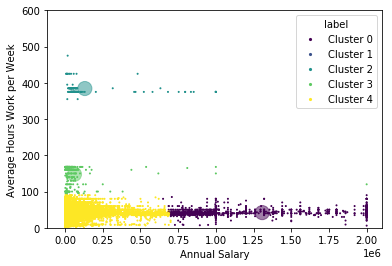

In [125]:
myfig = plt.scatter(fill_data["ConvertedComp"], fill_data['WorkWeekHrs'], c=kmean_data, s=1, cmap='viridis')
plt.scatter(salary_centers, weekhour_centers, c=np.unique(kmean_data), s=200, alpha=0.5);
plt.ylim(0, 600)
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Annual Salary")
plt.ylabel("Average Hours Work per Week")

lp = lambda i: plt.plot([],color=myfig.cmap(myfig.norm(i)), ms=np.sqrt(10), mec="none",
                        label="Cluster {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(kmean_data)]
plt.legend(handles=handles, loc="upper right", title="label")

plt.savefig("K-mean Clustering.png")

# Correlation between working hours and salary

In [126]:
np.corrcoef(fill_data["ConvertedComp"], fill_data['WorkWeekHrs'])

array([[1.       , 0.0138017],
       [0.0138017, 1.       ]])

# Plotting graph on multiple numeric columns
- YearsCode
- YearsCodePro
- CodeRevHrs
- Age
Looks like 40-60 programmer tend to have lower salaries.

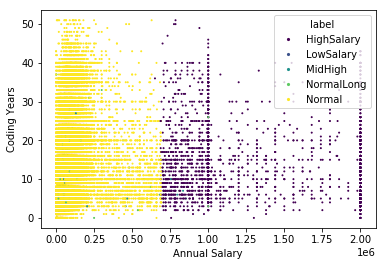

In [138]:
myfig = plt.scatter(fill_data["ConvertedComp"], fill_data['YearsCode'], c=kmean_data, s=1, cmap='viridis')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Annual Salary")
plt.ylabel("Coding Years")

lp = lambda i: plt.plot([],color=myfig.cmap(myfig.norm(i)), ms=np.sqrt(10), mec="none",
                        label="%s"%(cluster_df['nick_name'][i]), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(kmean_data)]
plt.legend(handles=handles, loc="upper right", title="label")

plt.savefig("K-mean Clustering YearsCode.png")

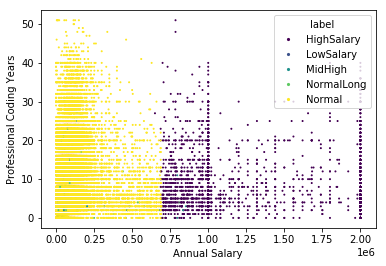

In [139]:
myfig = plt.scatter(fill_data["ConvertedComp"], fill_data['YearsCodePro'], c=kmean_data, s=1, cmap='viridis')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Annual Salary")
plt.ylabel("Professional Coding Years")

lp = lambda i: plt.plot([],color=myfig.cmap(myfig.norm(i)), ms=np.sqrt(10), mec="none",
                        label="%s"%(cluster_df['nick_name'][i]), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(kmean_data)]
plt.legend(handles=handles, loc="upper right", title="label")

plt.savefig("K-mean Clustering YearsCodePro.png")

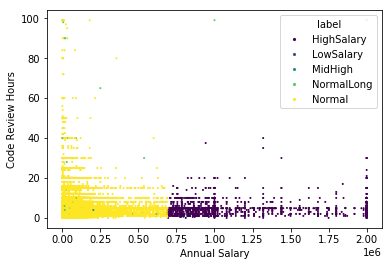

In [142]:
myfig = plt.scatter(fill_data["ConvertedComp"], fill_data['CodeRevHrs'], c=kmean_data, s=1, cmap='viridis')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Annual Salary")
plt.ylabel("Code Review Hours")

lp = lambda i: plt.plot([],color=myfig.cmap(myfig.norm(i)), ms=np.sqrt(10), mec="none",
                        label="%s"%(cluster_df['nick_name'][i]), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(kmean_data)]
plt.legend(handles=handles, loc="upper right", title="label")

plt.savefig("K-mean Clustering CodeRevHrs.png")

In [143]:
np.corrcoef(fill_data["ConvertedComp"], fill_data['CodeRevHrs'])

array([[ 1.        , -0.01973916],
       [-0.01973916,  1.        ]])

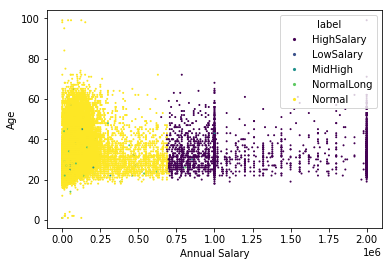

In [144]:
myfig = plt.scatter(fill_data["ConvertedComp"], fill_data['Age'], c=kmean_data, s=1, cmap='viridis')
plt.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
plt.xlabel("Annual Salary")
plt.ylabel("Age")

lp = lambda i: plt.plot([],color=myfig.cmap(myfig.norm(i)), ms=np.sqrt(10), mec="none",
                        label="%s"%(cluster_df['nick_name'][i]), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(kmean_data)]
plt.legend(handles=handles, loc="upper right", title="label")

plt.savefig("K-mean Clustering Age.png")

# Lasso linear model HighSalary
- Using clustering data, my prediction gets way better. 
- Using only numberic values will lower prediction accuracy.
- alpha value didn't impact the regression too much.

In [179]:
response_col = ["ConvertedComp"]
test_size = 0.2
rand_state = 123

scaled_lasso = scaled_data
scaled_lasso["kmean"] = kmean_data

In [180]:
lasso_highsalary = scaled_lasso.loc[scaled_lasso['kmean'] == 0]

#Split into explanatory and response variables
X = lasso_highsalary.drop(columns=response_col)
y = lasso_highsalary[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [181]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.5229312208810949
The testing score is:  0.5758502784118398


In [188]:
# Map weights for the lasso regression to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

def lasso_weight_map(lasso, data):
    weight = lasso.coef_
    feature = data.columns
    if len(weight) != len(feature):
        print("there is something wrong")
        return
    i = 0
    adict = {}
    while i<len(weight):
        adict[feature[i]] = weight[i]
        i = i+1
    sorted_adict = sorted(adict.items(), key=operator.itemgetter(1))
    return sorted_adict

In [210]:
# create a data frame from the sorted list.
def df_for_lasso(lasso_weight_list):
    
    name_list = []
    weight_list = []
    i = 0
    while i<len(lasso_weight_list):
        if lasso_weight_list[i][1]!=0:
            name_list.append(lasso_weight_list[i][0])
            weight_list.append(lasso_weight_list[i][1])
        i = i+1
    df = pd.DataFrame(weight_list, index=name_list, columns=["coef"])
    return df
    

In [190]:
reg_lasso.intercept_ 

array([11.83805445])

In [191]:
lasso_weight = lasso_weight_map(reg_lasso, X)
lasso_weight

[('Gender_Woman', -1.0348155202174494),
 ('Student_Yes, part-time', -0.9240236570687014),
 ('UndergradMajor_Fine arts or performing arts (ex. graphic design, music, studio art)',
  -0.8999259700701511),
 ('Country_United Kingdom', -0.8148339024694787),
 ('EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)', -0.8086850242197049),
 ('UndergradMajor_Information systems, information technology, or system administration',
  -0.6767717842653519),
 ('UndergradMajor_Another engineering discipline (ex. civil, electrical, mechanical)',
  -0.5644801478097183),
 ('Country_France', -0.5596703129930277),
 ('Country_Germany', -0.5355490099644409),
 ('Employment_Employed part-time', -0.5199394143757259),
 ("WorkPlan_There's no schedule or spec; I work on what seems most important or urgent",
  -0.40465013659999377),
 ('OpenSourcer_Less than once a month but more than once per year',
  -0.2860891771378935),
 ('SocialMedia_Instagram', -0.27807270313396315),
 ('Country_Spain', -0.15076094169893003),
 ('Op

In [212]:
highsalary_df = df_for_lasso(lasso_weight)
highsalary_df

,coef
Gender_Woman,-1.034816
"Student_Yes, part-time",-0.924024
"UndergradMajor_Fine arts or performing arts (ex. graphic design, music, studio art)",-0.899926
Country_United Kingdom,-0.814834
"EdLevel_Other doctoral degree (Ph.D, Ed.D., etc.)",-0.808685
"UndergradMajor_Information systems, information technology, or system administration",-0.676772
"UndergradMajor_Another engineering discipline (ex. civil, electrical, mechanical)",-0.564480
Country_France,-0.559670
Country_Germany,-0.535549
Employment_Employed part-time,-0.519939


In [214]:
highsalary_df.size

39

# Lasso linear model LowSalary

In [171]:
lasso_LowSalary = scaled_lasso.loc[scaled_lasso['kmean'] == 1]

#Split into explanatory and response variables
X = lasso_LowSalary.drop(columns=response_col)
y = lasso_LowSalary[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [172]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  1.0
The testing score is:  0.0


# Lasso linear model MidHigh

In [173]:
lasso_MidHigh = scaled_lasso.loc[scaled_lasso['kmean'] == 2]

#Split into explanatory and response variables
X = lasso_MidHigh.drop(columns=response_col)
y = lasso_MidHigh[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [174]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.39528023443580285
The testing score is:  -0.06139274283130525


# Lasso linear model NormalLong

In [175]:
lasso_NormalLong = scaled_lasso.loc[scaled_lasso['kmean'] == 3]

#Split into explanatory and response variables
X = lasso_NormalLong.drop(columns=response_col)
y = lasso_NormalLong[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [176]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.5717285637542908
The testing score is:  0.11874903812061954


# Lasso linear model Normal

In [177]:
lasso_Normal = scaled_lasso.loc[scaled_lasso['kmean'] == 4]

#Split into explanatory and response variables
X = lasso_Normal.drop(columns=response_col)
y = lasso_Normal[response_col]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

In [178]:
from sklearn import linear_model
reg_lasso = linear_model.Lasso(alpha=0.01)
reg_lasso.fit(X_train, y_train)  

#Predict using your model
y_test_lasso_preds = reg_lasso.predict(X_test)
y_train_lasso_preds = reg_lasso.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_lasso_preds)
train_score = r2_score(y_train, y_train_lasso_preds)

print("The training score is: ", train_score)
print("The testing score is: ", test_score)

The training score is:  0.18391200700258925
The testing score is:  0.17781236848756576


# plotting country distribution for HighSalary and Normal

In [218]:
plotting_data = mis_row_data
plotting_data["kmean"]= kmean_data

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


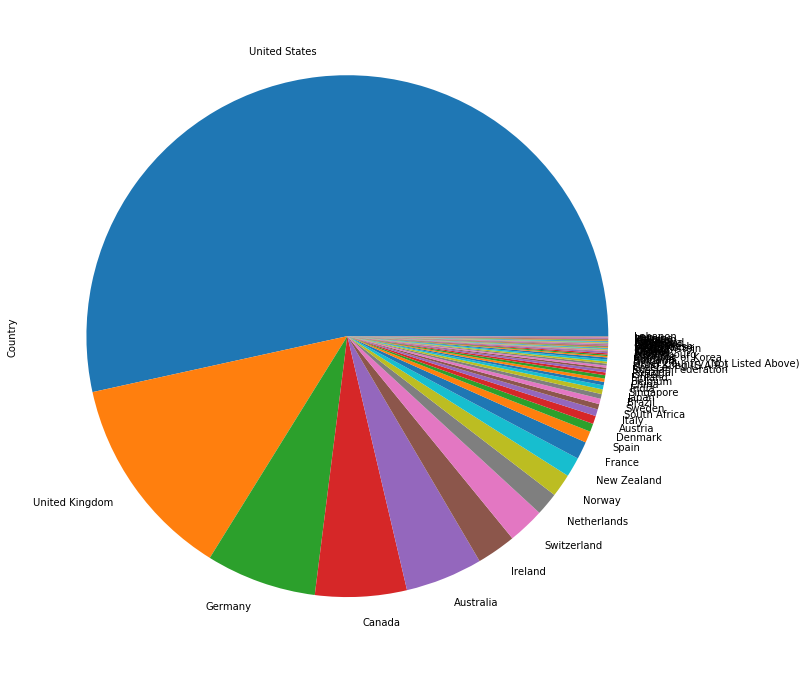

In [219]:
plotting_data["Country"].loc[scaled_lasso['kmean'] == 0].value_counts().plot.pie(figsize = (12,12))

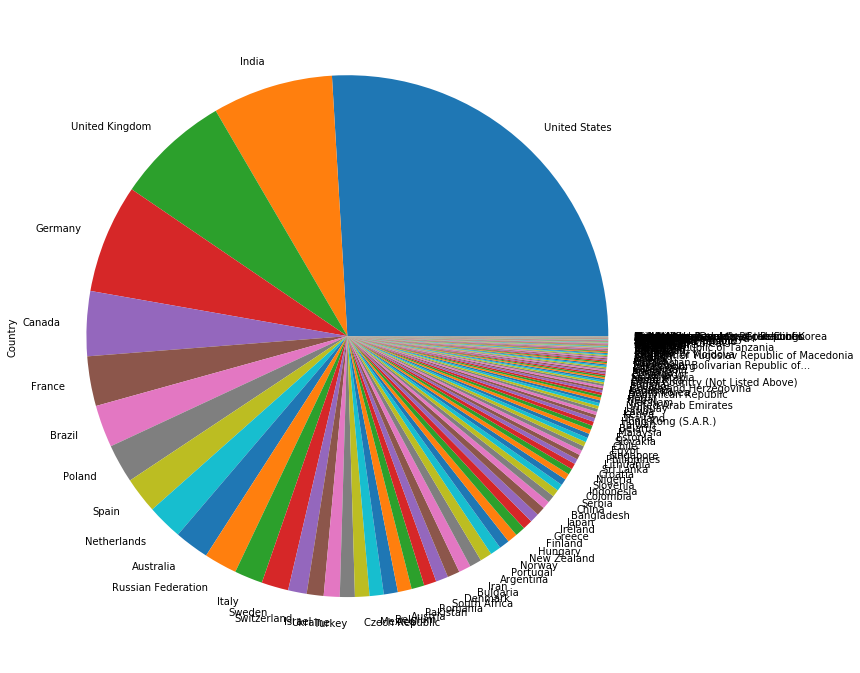

In [220]:
plotting_data["Country"].loc[scaled_lasso['kmean'] == 4].value_counts().plot.pie(figsize = (12,12))

# plotting social medium distribution for HighSalary and Normal

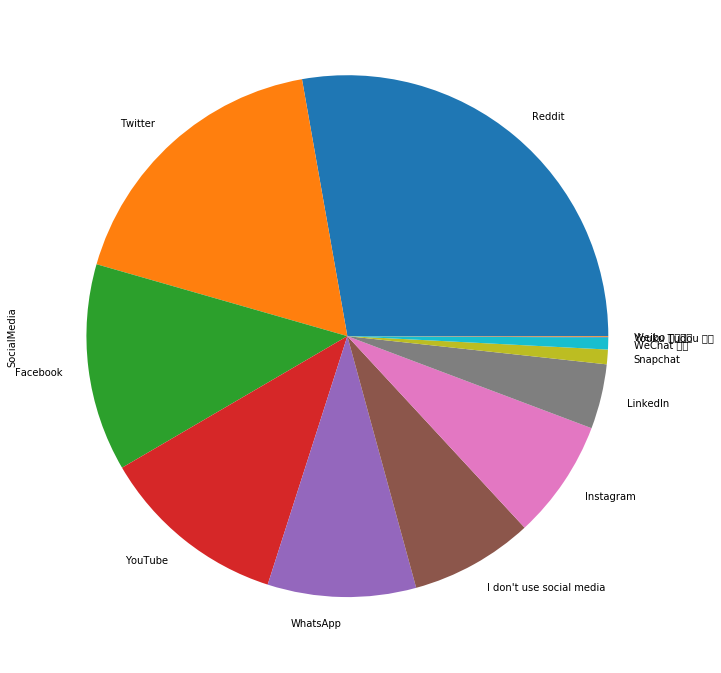

In [221]:
plotting_data["SocialMedia"].loc[scaled_lasso['kmean'] == 0].value_counts().plot.pie(figsize = (12,12))

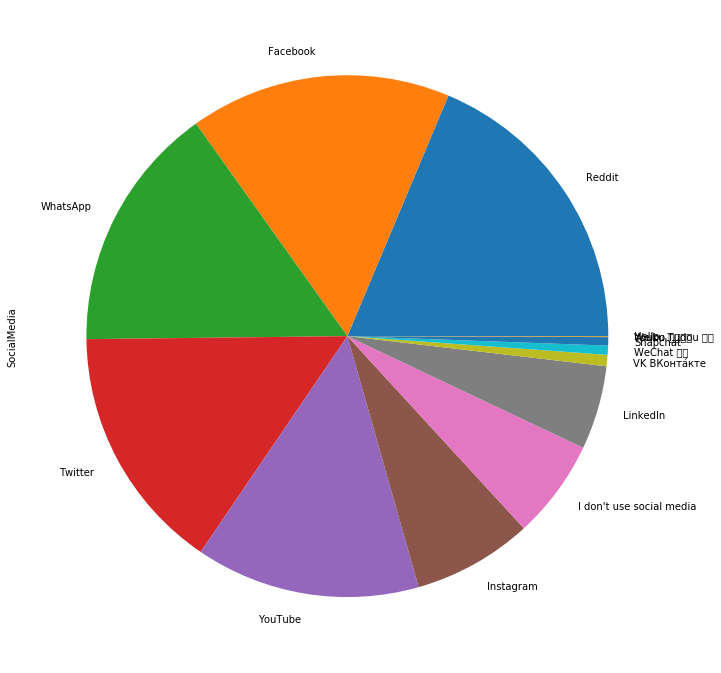

In [222]:
plotting_data["SocialMedia"].loc[scaled_lasso['kmean'] == 4].value_counts().plot.pie(figsize = (12,12))

# plotting gender distribution for HighSalary and Normal

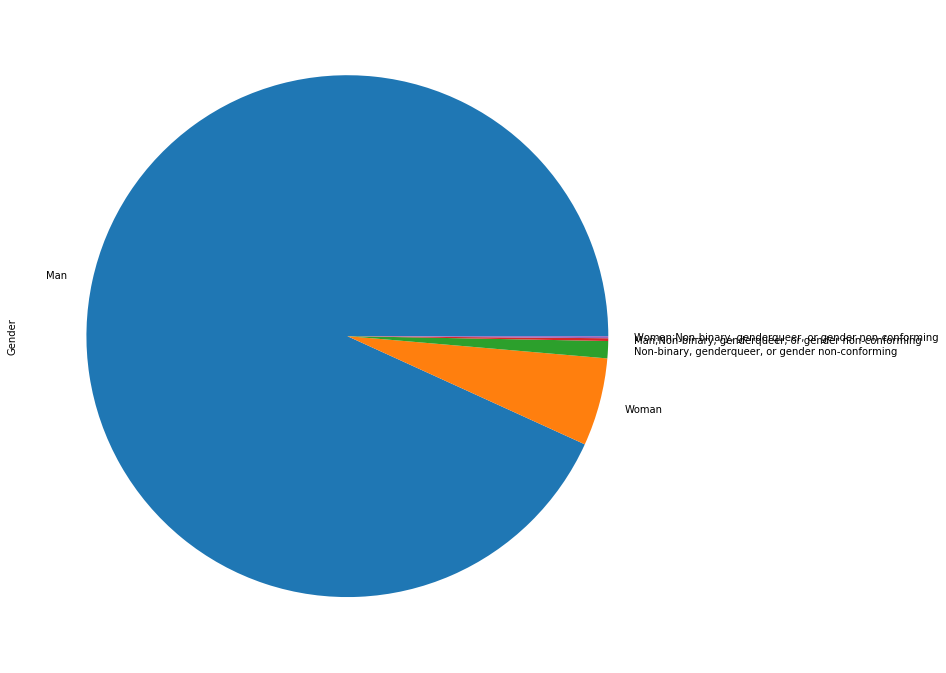

In [223]:
plotting_data["Gender"].loc[scaled_lasso['kmean'] == 0].value_counts().plot.pie(figsize = (12,12))

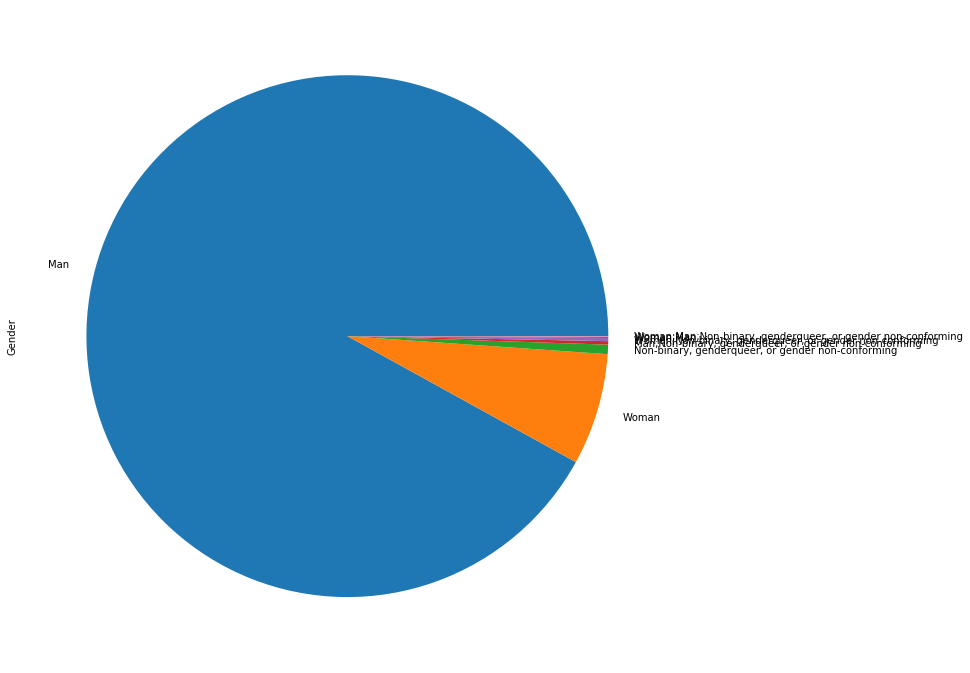

In [224]:
plotting_data["Gender"].loc[scaled_lasso['kmean'] == 4].value_counts().plot.pie(figsize = (12,12))

# plotting Multiple distribution for HighSalary and Normal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F451FA5550>,
      dtype=object)

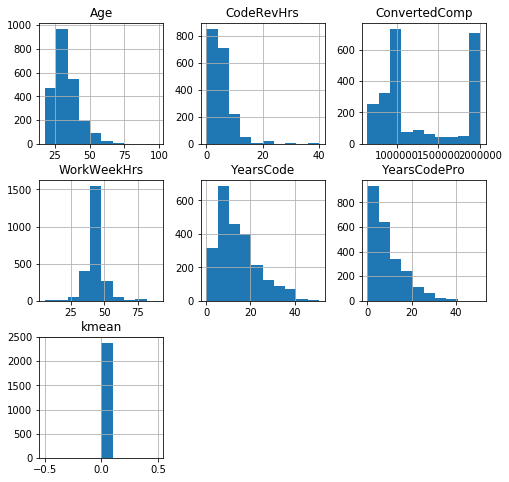

In [225]:
plotting_data.loc[scaled_lasso['kmean'] == 0].hist(figsize = (8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F451FE7710>,
      dtype=object)

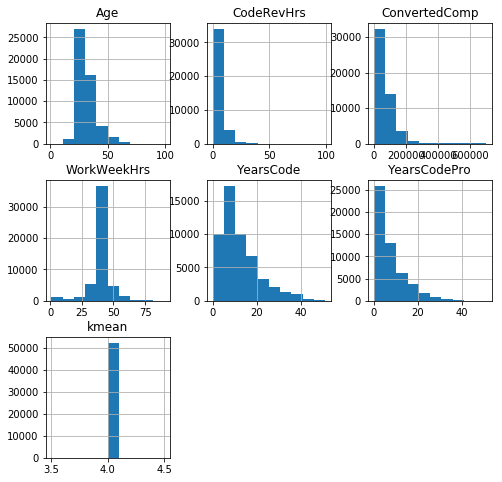

In [226]:
plotting_data.loc[scaled_lasso['kmean'] == 4].hist(figsize = (8,8))

# plotting Education level for HighSalary and Normal

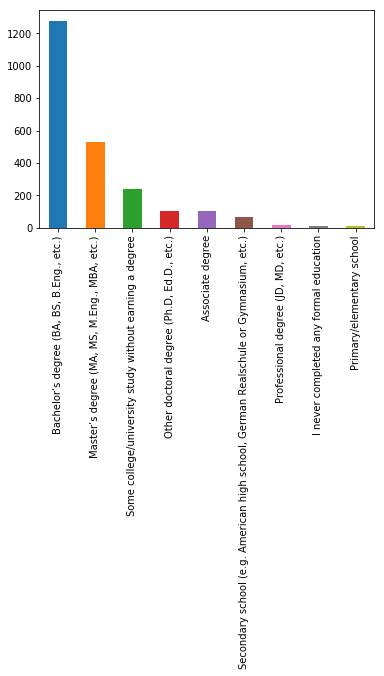

In [227]:
# education level for people who took survey
plotting_data.loc[scaled_lasso['kmean'] == 0]["EdLevel"].value_counts().plot.bar()

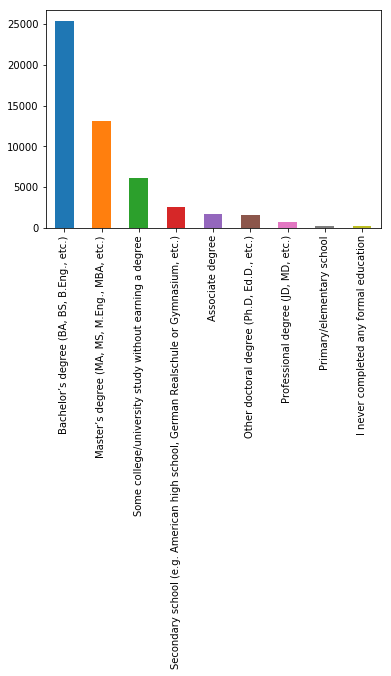

In [228]:
# education level for people who took survey
plotting_data.loc[scaled_lasso['kmean'] == 4]["EdLevel"].value_counts().plot.bar()

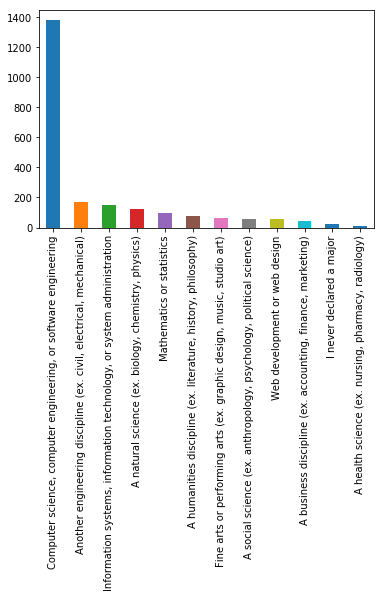

In [237]:
# education level for people who took survey
plotting_data.loc[scaled_lasso['kmean'] == 0]["UndergradMajor"].value_counts().plot.bar()

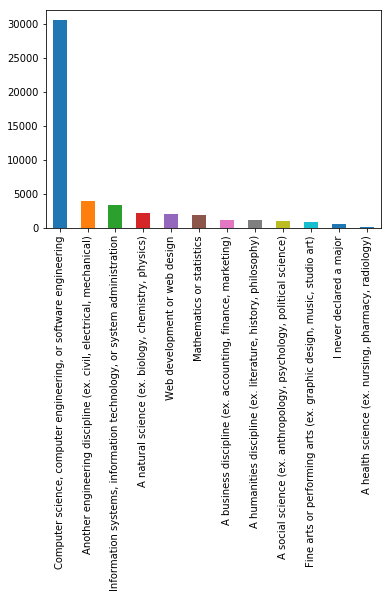

In [238]:
# education level for people who took survey
plotting_data.loc[scaled_lasso['kmean'] == 4]["UndergradMajor"].value_counts().plot.bar()

# plotting employment distribution for HighSalary and Normal

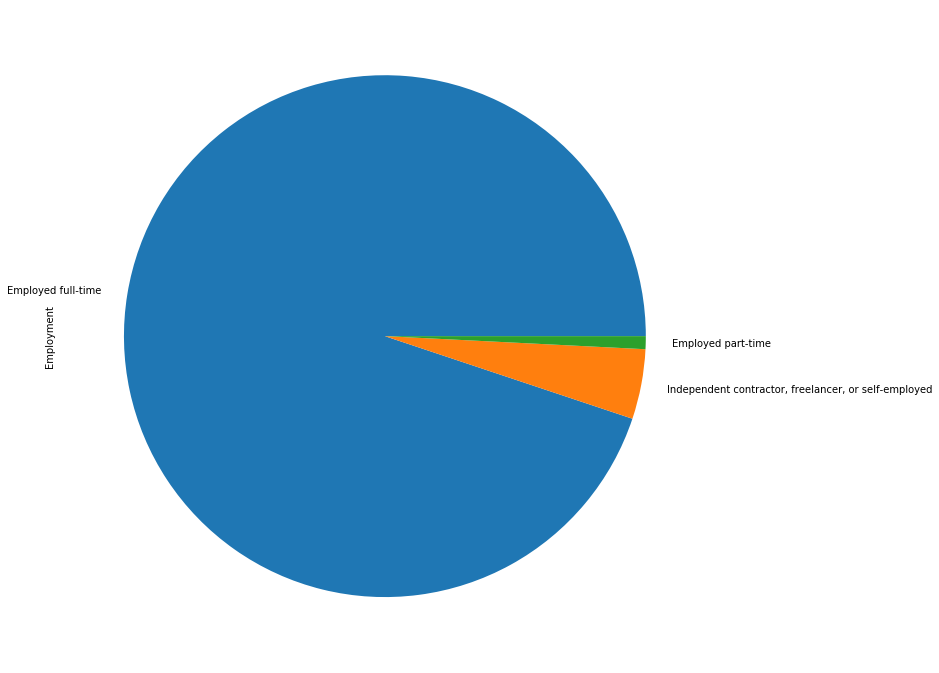

In [233]:
plotting_data["Employment"].loc[scaled_lasso['kmean'] == 0].value_counts().plot.pie(figsize = (12,12))

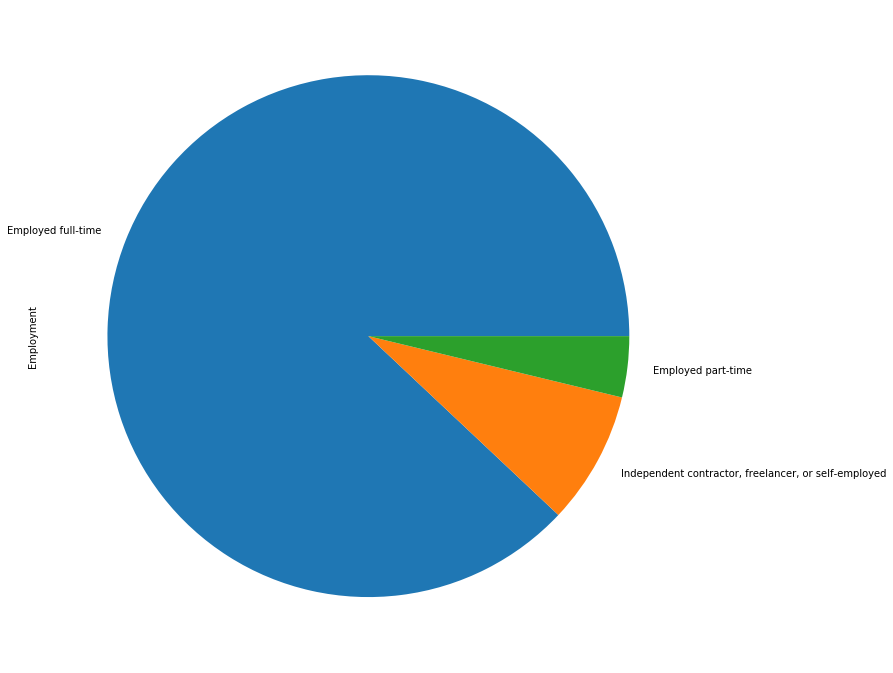

In [234]:
plotting_data["Employment"].loc[scaled_lasso['kmean'] == 4].value_counts().plot.pie(figsize = (12,12))

# Hobbyist

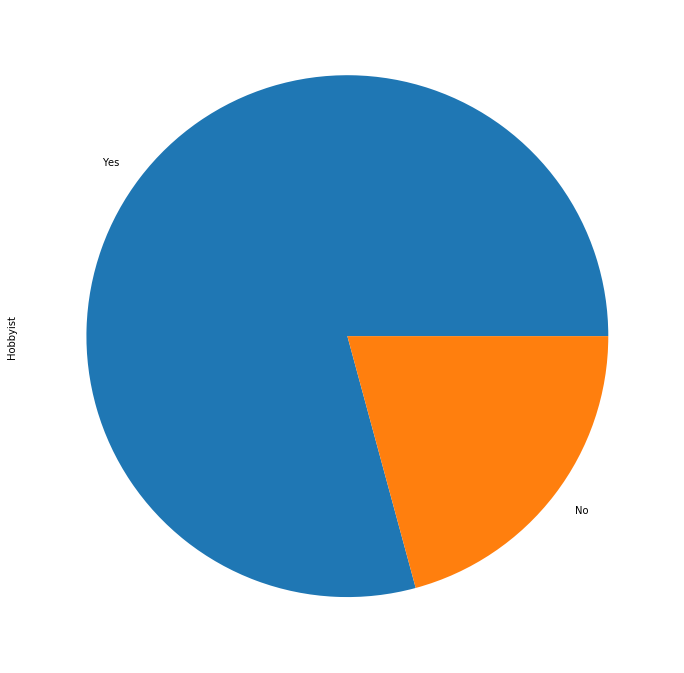

In [235]:
plotting_data["Hobbyist"].loc[scaled_lasso['kmean'] == 0].value_counts().plot.pie(figsize = (12,12))

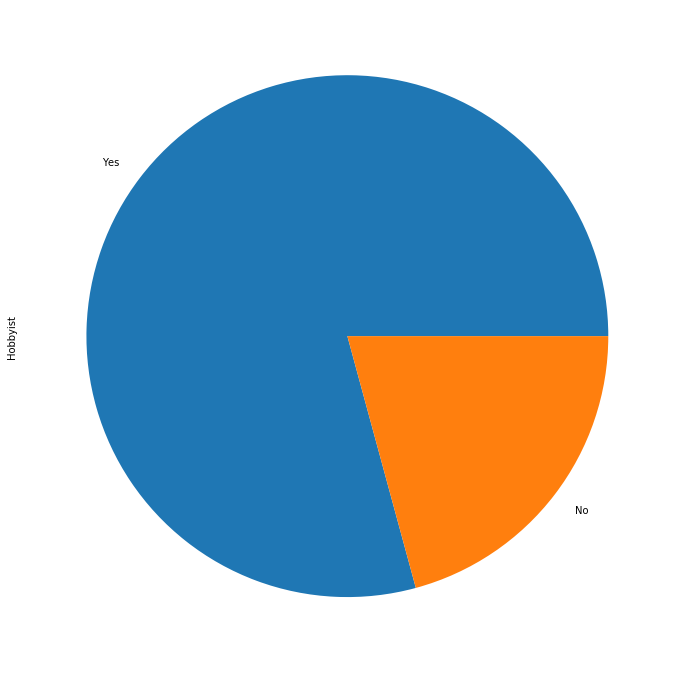

In [236]:
plotting_data["Hobbyist"].loc[scaled_lasso['kmean'] == 4].value_counts().plot.pie(figsize = (12,12))

# Creating social medium bar plot for HighSalary group and Normal group

In [239]:
HighSalary_social = plotting_data["SocialMedia"].loc[scaled_lasso['kmean'] == 0].value_counts()
Normal_social = plotting_data["SocialMedia"].loc[scaled_lasso['kmean'] == 4].value_counts()

In [240]:
HighSalary_social

Reddit                      644
Twitter                     412
Facebook                    298
YouTube                     270
WhatsApp                    213
I don't use social media    177
Instagram                   171
LinkedIn                    93 
Snapchat                    21 
WeChat 微信                   17 
Youku Tudou 优酷              1  
Weibo 新浪微博                  1  
Name: SocialMedia, dtype: int64

In [241]:
Normal_social

Reddit                      9410
Facebook                    8156
WhatsApp                    7727
Twitter                     7718
YouTube                     7009
Instagram                   3739
I don't use social media    3094
LinkedIn                    2617
VK ВКонта́кте               353 
WeChat 微信                   286 
Snapchat                    261 
Weibo 新浪微博                  22  
Youku Tudou 优酷              7   
Hello                       1   
Name: SocialMedia, dtype: int64

In [248]:
HighSalary_name = HighSalary_social.index
Normal_name = Normal_social.index

SocialMedium_name = list(set(HighSalary_name).union( set(Normal_name)) ) # Union of two set
SocialMedium_name

['Facebook',
 'Youku Tudou 优酷',
 'Twitter',
 'Weibo 新浪微博',
 'LinkedIn',
 'Instagram',
 'Snapchat',
 'WeChat 微信',
 'YouTube',
 'VK ВКонта́кте',
 'Hello',
 'WhatsApp',
 'Reddit',
 "I don't use social media"]

In [256]:
# Create list for social medium counts
i = 0
HighSalary_values = []
Normal_values = []
while i<len(SocialMedium_name):

    try:
        HS_count = HighSalary_social[SocialMedium_name[i]]
    except:
        HS_count = 0
        
    try:
        N_count = Normal_social[SocialMedium_name[i]]
    except:
        N_count = 0
        
    HighSalary_values.append(HS_count)
    Normal_values.append(N_count)
    
    i = i+1

In [257]:
HighSalary_values

[298, 1, 412, 1, 93, 171, 21, 17, 270, 0, 0, 213, 644, 177]

In [258]:
Normal_values

[8156, 7, 7718, 22, 2617, 3739, 261, 286, 7009, 353, 1, 7727, 9410, 3094]

In [263]:
# create social medium dataframe
social_df = pd.DataFrame({'High Salary': HighSalary_values, 'Common Salary': Normal_values}, index=SocialMedium_name)

<Figure size 360x864 with 0 Axes>

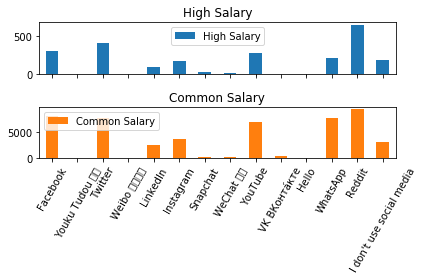

In [271]:
plt.figure(figsize=(5, 12))
axes = social_df.plot.bar(rot=60, subplots=True)
axes[1].legend(loc=2)  # doctest: +SKIP
plt.tight_layout()
plt.savefig("Social Medium Compare.png")